In [39]:
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [40]:
df = pd.read_csv('updated_bus.csv', parse_dates=['Month'])

In [46]:
df_sat = df.loc[df['Day'] == "SAT."]
df_sun = df.loc[df['Day'] == "SUN."]
df_wd = df.loc[df['Day'] == "WEEKDAY"]

df_sat = df_sat.drop(columns=['Day'])
df_sun = df_sun.drop(columns=['Day'])
df_wd = df_wd.drop(columns=['Day'])

df_sat.columns = ['ds','y']
df_sun.columns = ['ds','y']
df_wd.columns = ['ds','y']

### Prophet forecast for PGH Port Authority Bus Route 16, Saturday Schedule

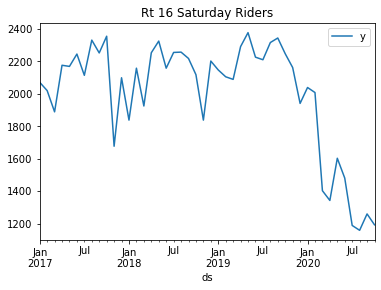

In [48]:
df_sat.plot(x="ds", y="y", title='Rt 16 Saturday Riders')
pyplot.show()

In [49]:
m = Prophet()
m.fit(df_sat) # this takes a few seconds
print("done")

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


In [50]:
fcst = m.predict(df_sat)
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,2393.930005,1821.656864,2485.116609,2393.930005,2393.930005,-238.344748,-238.344748,-238.344748,-238.344748,-238.344748,-238.344748,0.0,0.0,0.0,2155.585257
1,2017-02-01,2378.501232,1953.372135,2621.587472,2378.501232,2378.501232,-86.744923,-86.744923,-86.744923,-86.744923,-86.744923,-86.744923,0.0,0.0,0.0,2291.756309
2,2017-03-01,2364.565567,1765.332632,2431.329336,2364.565567,2364.565567,-265.342384,-265.342384,-265.342384,-265.342384,-265.342384,-265.342384,0.0,0.0,0.0,2099.223183
3,2017-04-01,2349.136794,1912.295838,2587.535006,2349.136794,2349.136794,-85.274058,-85.274058,-85.274058,-85.274058,-85.274058,-85.274058,0.0,0.0,0.0,2263.862736
4,2017-05-01,2334.205724,2065.430293,2750.613828,2334.205724,2334.205724,73.919383,73.919383,73.919383,73.919383,73.919383,73.919383,0.0,0.0,0.0,2408.125107


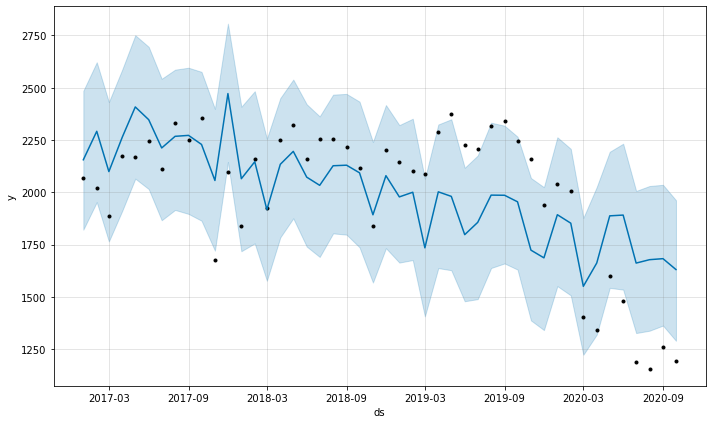

In [51]:
fig1 = m.plot(fcst)

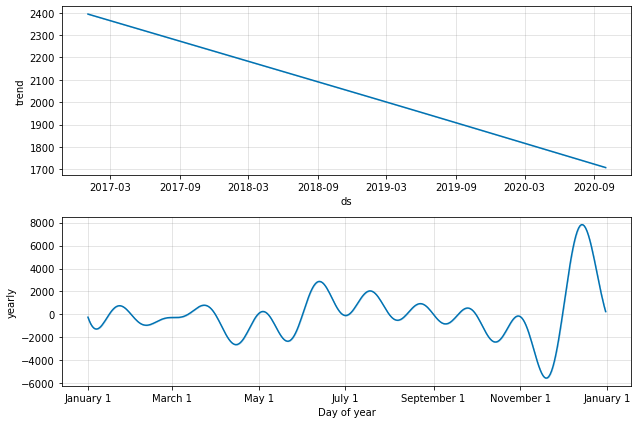

In [52]:
fig1 = m.plot_components(fcst)

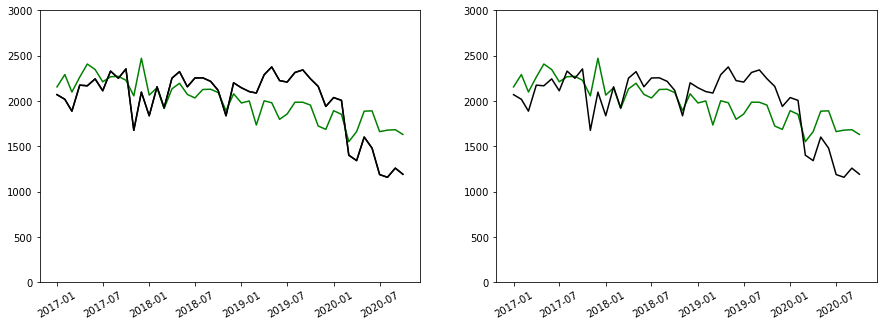

In [54]:
fig1 = pyplot.figure()
fig1.set_figheight(5)
fig1.set_figwidth(15)

ax0 = fig1.add_subplot(121)
ax0.plot_date(x=df_sat["ds"], y=df_sat["y"], fmt="k-")
ax0.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax0.plot_date(x=df_sat["ds"], y=df_sat["y"], fmt="k-")
pyplot.ylim(0,3000)
ax0.xaxis.set_tick_params(rotation=30, labelsize=10)

ax1 = fig1.add_subplot(122)
ax1.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax1.plot_date(x=df_sat["ds"], y=df_sat["y"], fmt="k-")
pyplot.ylim(0,3000)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

pyplot.show()

In [55]:
MSE = mean_squared_error(y_true=df_sat['y'], y_pred=fcst['yhat'])
print(MSE)

71106.80323097619


In [66]:
MAE = mean_absolute_error(y_true=df_sat['y'], y_pred=fcst['yhat'])
print(MAE)

644.3886604122334


### Prophet forecast for PGH Port Authority Bus Route 16, Sunday Schedule

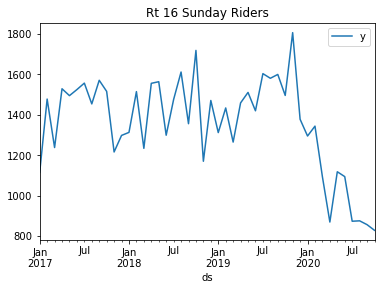

In [71]:
df_sun.plot(x="ds", y="y", title='Rt 16 Sunday Riders')
pyplot.show()

In [59]:
m = Prophet()
m.fit(df_sun) # this takes a few seconds
print("done")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


In [60]:
fcst = m.predict(df_sun)
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,1516.496169,1068.182395,1464.098575,1516.496169,1516.496169,-260.680024,-260.680024,-260.680024,-260.680024,-260.680024,-260.680024,0.0,0.0,0.0,1255.816145
1,2017-02-01,1512.607713,1363.930222,1746.839160,1512.607713,1512.607713,49.287897,49.287897,49.287897,49.287897,49.287897,49.287897,0.0,0.0,0.0,1561.895611
2,2017-03-01,1509.095560,1143.892986,1533.497157,1509.095560,1509.095560,-171.375433,-171.375433,-171.375433,-171.375433,-171.375433,-171.375433,0.0,0.0,0.0,1337.720127
3,2017-04-01,1505.207104,1233.768721,1637.133285,1505.207104,1505.207104,-77.747780,-77.747780,-77.747780,-77.747780,-77.747780,-77.747780,0.0,0.0,0.0,1427.459324
4,2017-05-01,1501.444082,1341.492688,1745.008939,1501.444082,1501.444082,39.550321,39.550321,39.550321,39.550321,39.550321,39.550321,0.0,0.0,0.0,1540.994404


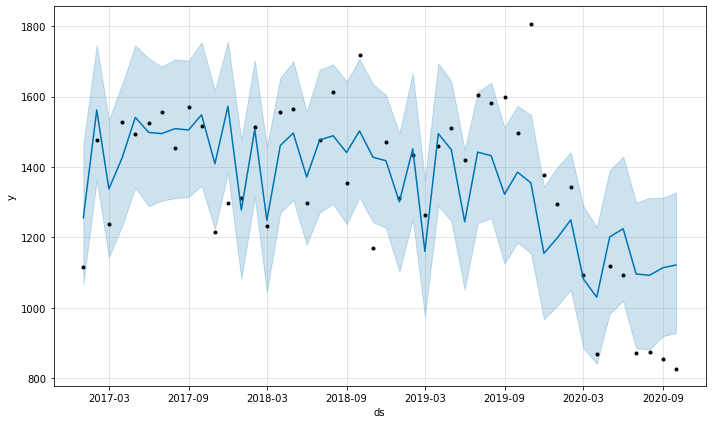

In [61]:
fig1 = m.plot(fcst)

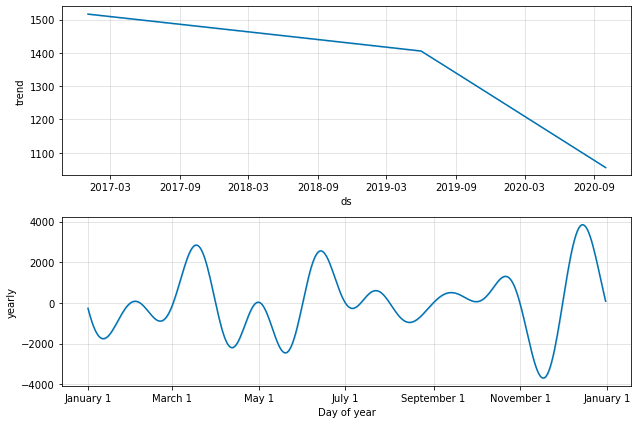

In [62]:
fig1 = m.plot_components(fcst)

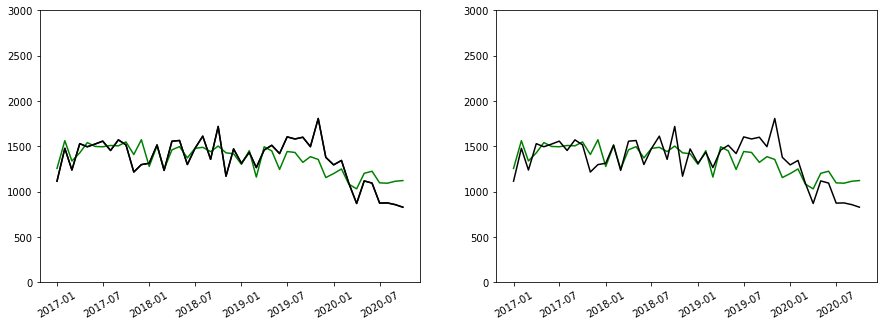

In [63]:
fig1 = pyplot.figure()
fig1.set_figheight(5)
fig1.set_figwidth(15)

ax0 = fig1.add_subplot(121)
ax0.plot_date(x=df_sun["ds"], y=df_sun["y"], fmt="k-")
ax0.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax0.plot_date(x=df_sun["ds"], y=df_sun["y"], fmt="k-")
pyplot.ylim(0,3000)
ax0.xaxis.set_tick_params(rotation=30, labelsize=10)

ax1 = fig1.add_subplot(122)
ax1.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax1.plot_date(x=df_sun["ds"], y=df_sun["y"], fmt="k-")
pyplot.ylim(0,3000)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

pyplot.show()

In [83]:
MSE = mean_squared_error(y_true=df_sun['y'], y_pred=fcst['yhat'])
print(MSE)

5068621.404469807


In [84]:
MAE = mean_absolute_error(y_true=df_sun['y'], y_pred=fcst['yhat'])
print(MAE)

2191.1733600703037


### Prophet forecast for PGH Port Authority Bus Route 16, Weekday Schedule

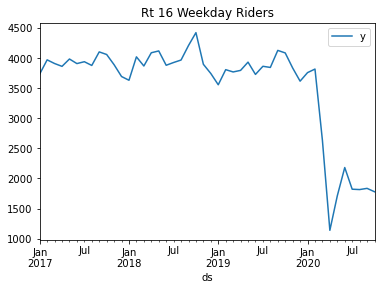

In [70]:
df_wd.plot(x="ds", y="y", title='Rt 16 Weekday Riders')
pyplot.show()

In [72]:
m = Prophet()
m.fit(df_wd) # this takes a few seconds
print("done")

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


done


In [75]:
fcst = m.predict(df_wd)
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,4588.665668,3357.393378,4752.545182,4588.665668,4588.665668,-530.374460,-530.374460,-530.374460,-530.374460,-530.374460,-530.374460,0.0,0.0,0.0,4058.291208
1,2017-02-01,4547.034694,3821.959386,5179.527371,4547.034694,4547.034694,-17.085682,-17.085682,-17.085682,-17.085682,-17.085682,-17.085682,0.0,0.0,0.0,4529.949012
2,2017-03-01,4509.432524,3658.464007,5052.911799,4509.432524,4509.432524,-129.228968,-129.228968,-129.228968,-129.228968,-129.228968,-129.228968,0.0,0.0,0.0,4380.203556
3,2017-04-01,4467.801550,3162.566993,4530.554202,4467.801550,4467.801550,-624.633735,-624.633735,-624.633735,-624.633735,-624.633735,-624.633735,0.0,0.0,0.0,3843.167815
4,2017-05-01,4427.513511,3446.573248,4858.973394,4427.513511,4427.513511,-266.448087,-266.448087,-266.448087,-266.448087,-266.448087,-266.448087,0.0,0.0,0.0,4161.065424


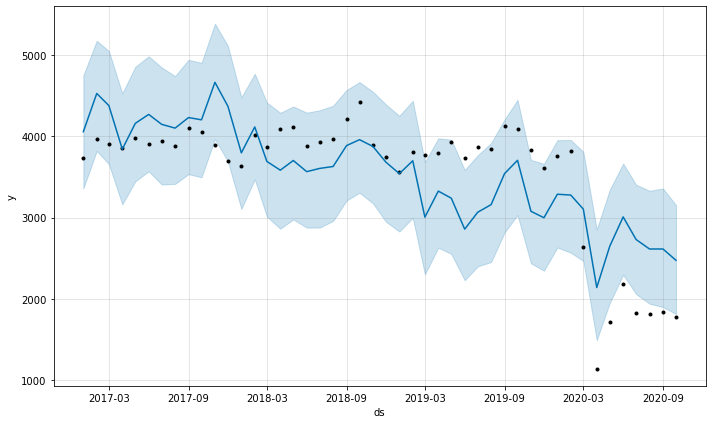

In [77]:
fig1 = m.plot(fcst)

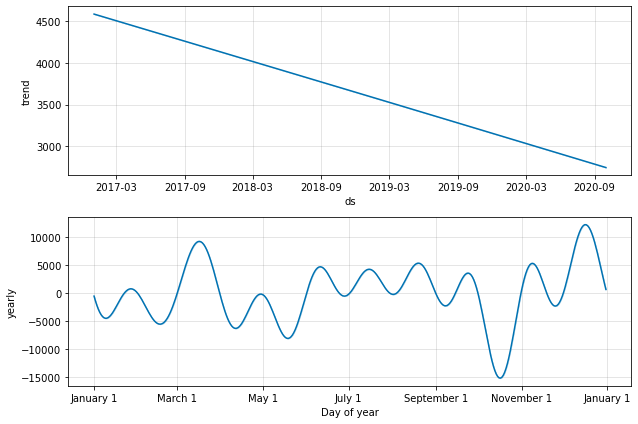

In [78]:
fig1 = m.plot_components(fcst)

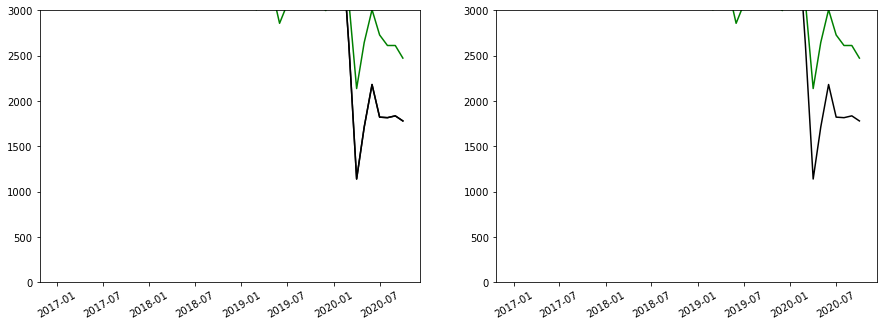

In [79]:
fig1 = pyplot.figure()
fig1.set_figheight(5)
fig1.set_figwidth(15)

ax0 = fig1.add_subplot(121)
ax0.plot_date(x=df_wd["ds"], y=df_wd["y"], fmt="k-")
ax0.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax0.plot_date(x=df_wd["ds"], y=df_wd["y"], fmt="k-")
pyplot.ylim(0,3000)
ax0.xaxis.set_tick_params(rotation=30, labelsize=10)

ax1 = fig1.add_subplot(122)
ax1.plot_date(x=fcst["ds"], y=fcst["yhat"], fmt="g-")
ax1.plot_date(x=df_wd["ds"], y=df_wd["y"], fmt="k-")
pyplot.ylim(0,3000)
ax1.xaxis.set_tick_params(rotation=30, labelsize=10)

pyplot.show()

In [81]:
MSE = mean_squared_error(y_true=df_wd['y'], y_pred=fcst['yhat'])
print(MSE)

295033.18385201535


In [82]:
MAE = mean_absolute_error(y_true=df_wd['y'], y_pred=fcst['yhat'])
print(MAE)

466.06668608719275
